import libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/Python/ICA/02_VGG16_dogs_cats'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [0]:
from keras.models import Model, Input, Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.applications import  VGG16
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.optimizers import SGD
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
from keras import losses
import keras
from keras.optimizers import RMSprop

import pickle
import cv2
import numpy as np
from PIL import Image
from IPython.display import Image
from random import randint
import matplotlib.pylab as plt
from transfer_learning_utils import *
from numpy import argmax
from numpy.random import randint    # only to generate a random nuymber ar end

import datetime

import os, cv2, re, random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
from itertools import cycle, islice
import time


plt.style.use('seaborn-whitegrid')

In [0]:
from random import shuffle

img_width = 224
img_height = 224
total_images_train=4200
total_images_test=800
total_images=total_images_train+total_images_test
batch_size=256

TRAIN_DIR = 'train/'
TEST_DIR = 'test/'
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
test_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset

# test_images_dogs_cats = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

shuffle(train_images_dogs_cats)
train_images_dogs_cats = train_images_dogs_cats[0:total_images_train]


shuffle(test_images_dogs_cats)
test_images_dogs_cats = test_images_dogs_cats[total_images_train:total_images_train+total_images_test]

# shuffle(test_images_dogs_cats)

In [0]:
def data_generator_cat_dog(list_of_images, batch_size):
    num_steps = len(list_of_images)//batch_size
    while True:
      for i in range(num_steps):
        sublist=list_of_images[(i*batch_size):((i+1)*batch_size)]
        yield get_batch(sublist)

def get_batch(sub_list):
    x=np.zeros((len(sub_list),img_width,img_height,3))
    y=np.zeros((len(sub_list)))
    for i, image in enumerate(sub_list):
        x[i,:]=cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC)
        x[i,:,:,(0, 1, 2)]=x[i,:,:,(2, 1, 0)]
    
    for i, image in enumerate(sub_list):
        if 'dog' in image:
            y[i]=1
        elif 'cat' in image:
            y[i]=0
        else:
            print('neither cat nor dog name present in images')
    return x, y

In [0]:
train_generator = data_generator_cat_dog(list_of_images=train_images_dogs_cats, batch_size=batch_size)
test_generator = data_generator_cat_dog(list_of_images=test_images_dogs_cats, batch_size=batch_size)

set the basic configurations, load the MNIST database and convert it to the necessary format

In [0]:
model = keras.models.load_model('final_model_complete.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
model.summary()

Model: "model_end_sub_models"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
model_sub_VGG16 (Model)      (None, 25088)             14714688  
_________________________________________________________________
model_classifier (Model)     (None, 2)                 3211650   
Total params: 17,926,338
Trainable params: 17,926,338
Non-trainable params: 0
_________________________________________________________________


In [0]:
def test_prediction(samples_number):
  x, y = next(train_generator)
  result=model.predict(x[:samples_number,:,:,:].reshape(samples_number,224,224,3))
  test_result=[]

  for i, res in enumerate(result):
    test_result.append(['a', 'b'])

    # pred
    if (argmax(res)==1):
      test_result[i][1]='dog'
    elif (argmax(res)==0):
      test_result[i][1]='cat'
    else:
      test_result[i][1]='non'
    
    
    # org
    if (y[i]==1):
      test_result[i][0]='dog'
    elif (y[i]==0):
      test_result[i][0]='cat'
    else:
      test_result[i][0]='non'
    # plt.imshow(x[i,:,:,:].astype(int))
    # plt.figure()
  
  fig=plt.figure()
  fig=plt.figure(figsize=(10, 10))
  columns = 4
  rows = (samples_number//4)+1
  print(rows)
  for i, res in enumerate(result):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(x[i].astype(int))
    plt.title(('pred: ' + test_result[i][0] + '\n real: ' + test_result[i][1]))
  plt.show()
  return test_result

1


<Figure size 432x288 with 0 Axes>

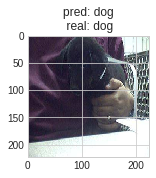

[['dog', 'dog']]

In [0]:
test_prediction(1)

In [0]:
runs=100
print('creating database...')
x_test, y_test = next(train_generator)
print('database ready!!!')

creating database...
database ready!!!


ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!
Average time [ms] for batch of 4  :  16.02428436279297
Average time [ms] for batch of 8  :  29.88339900970459
Average time [ms] for batch of 16  :  50.641634464263916
Average time [ms] for batch of 32  :  104.29230690002441
Average time [ms] for batch of 64  :  198.4252643585205
Average time [ms] for batch of 128  :  392.6573657989502
Average time [ms] for batch of 256  :  764.186532497406

Average time/batch size [ms] for batch of 4  :  4.006071090698242
Average time/batch size [ms] for batch of 8  :  3.7354248762130737
Average time/batch size [ms] for batch of 16  :  3.1651021540164948
Average time/batch size [ms] for batch of 32  :  3.259134590625763
Average time/batch size [ms] for batch of 64  :  3.100394755601883
Average time/batch size [ms] for batch of 128  :  3.0676356703042984
Average time/batch s

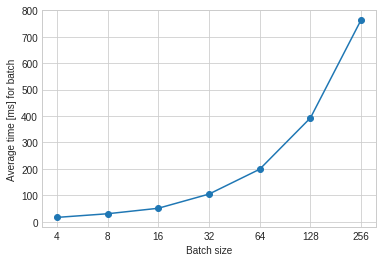

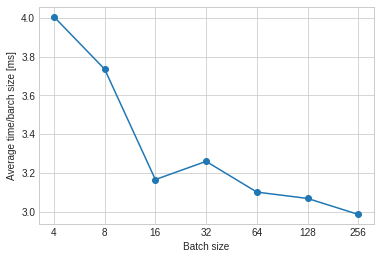

In [0]:
times_model=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    model.predict(x_test[:2**(i+2),:,:,:])
  end_time_one_batch=time.time()
  times_model[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_model[i,1]=times_model[i,1]/(2**(i+2))
  print('ready for batch of',2**(i+2) ,'!!!')


# to plot***********************************************
x1=[0, 1, 2, 3, 4, 5, 6]
x2=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x1, times_model[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x1, my_xticks)

plt.figure()
plt.plot(x2, times_model[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x2, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_model[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_model[i,1])


In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))

 | 16.0243 | 29.8834 | 50.6416 | 104.2923 | 198.4253 | 392.6574 | 764.1865

 | 4.0061 | 3.7354 | 3.1651 | 3.2591 | 3.1004 | 3.0676 | 2.9851


With Frozen

In [0]:
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('final_model_graph_frozen.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/model_classifier/activation_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/input_3:0')

ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!
Average time [ms] for batch of 4  :  19.193367958068848
Average time [ms] for batch of 8  :  27.665255069732666
Average time [ms] for batch of 16  :  41.61341428756714
Average time [ms] for batch of 32  :  80.20694494247437
Average time [ms] for batch of 64  :  168.9512062072754
Average time [ms] for batch of 128  :  336.5472650527954
Average time [ms] for batch of 256  :  675.3406643867493

Average time/batch size [ms] for batch of 4  :  4.798341989517212
Average time/batch size [ms] for batch of 8  :  3.4581568837165833
Average time/batch size [ms] for batch of 16  :  2.600838392972946
Average time/batch size [ms] for batch of 32  :  2.506467029452324
Average time/batch size [ms] for batch of 64  :  2.639862596988678
Average time/batch size [ms] for batch of 128  :  2.629275508224964
Average time/batch si

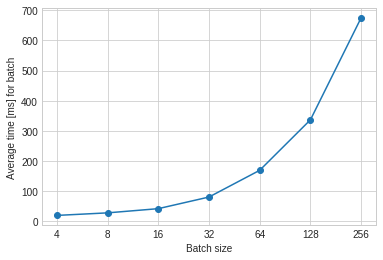

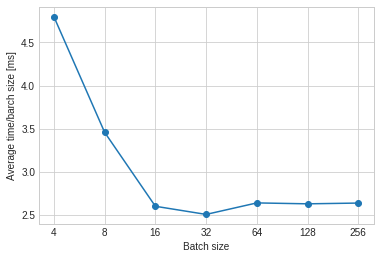

In [0]:
# We launch a Session
sess = tf.Session(graph=graph)

times_frozen=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: x_test[:2**(i+2),:,:,:]})
  end_time_one_batch=time.time()
  times_frozen[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_frozen[i,1]=times_frozen[i,1]/(2**(i+2))
  print('ready for batch of',2**(i+2) ,'!!!')


# to plot***********************************************
x3=[0, 1, 2, 3, 4, 5, 6]
x4=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x3, times_frozen[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x3, my_xticks)

plt.figure()
plt.plot(x4, times_frozen[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x4, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,1])

In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))

 | 19.1934 | 27.6653 | 41.6134 | 80.2069 | 168.9512 | 336.5473 | 675.3407

 | 4.7983 | 3.4582 | 2.6008 | 2.5065 | 2.6399 | 2.6293 | 2.6380


Optimized

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('final_model_graph_optimized.pb')

In [0]:
with graph.as_default():
  # We access the input and output nodes 
  output_node = graph.get_tensor_by_name('prefix/model_classifier/activation_2/Softmax:0')
  input_node = graph.get_tensor_by_name('prefix/input_3:0')

ready for batch of 4 !!!
ready for batch of 8 !!!
ready for batch of 16 !!!
ready for batch of 32 !!!
ready for batch of 64 !!!
ready for batch of 128 !!!
ready for batch of 256 !!!
Average time [ms] for batch of 4  :  19.207346439361572
Average time [ms] for batch of 8  :  28.88981580734253
Average time [ms] for batch of 16  :  42.30370283126831
Average time [ms] for batch of 32  :  80.47624349594116
Average time [ms] for batch of 64  :  158.28163623809814
Average time [ms] for batch of 128  :  318.4035587310791
Average time [ms] for batch of 256  :  647.6943469047546

Average time/batch size [ms] for batch of 4  :  4.801836609840393
Average time/batch size [ms] for batch of 8  :  3.611226975917816
Average time/batch size [ms] for batch of 16  :  2.6439814269542694
Average time/batch size [ms] for batch of 32  :  2.5148826092481613
Average time/batch size [ms] for batch of 64  :  2.4731505662202835
Average time/batch size [ms] for batch of 128  :  2.4875278025865555
Average time/batch

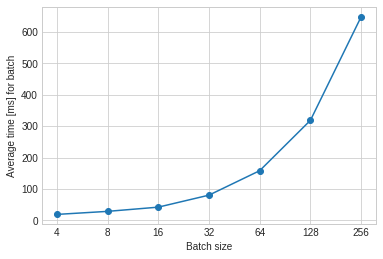

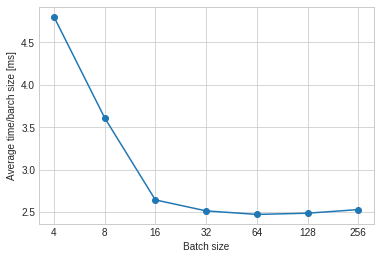

In [0]:
# We launch a Session
sess = tf.Session(graph=graph)

times_optimized=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: x_test[:2**(i+2),:,:,:]})
  end_time_one_batch=time.time()
  times_optimized[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_optimized[i,1]=times_optimized[i,1]/(2**(i+2))
  print('ready for batch of',2**(i+2) ,'!!!')







# to plot***********************************************
x5=[0, 1, 2, 3, 4, 5, 6]
x6=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x5, times_optimized[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x5, my_xticks)

plt.figure()
plt.plot(x6, times_optimized[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x6, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,1])

In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

 | 19.2073 | 28.8898 | 42.3037 | 80.4762 | 158.2816 | 318.4036 | 647.6943

 | 4.8018 | 3.6112 | 2.6440 | 2.5149 | 2.4732 | 2.4875 | 2.5301


Comparison

Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 16.0243 | 29.8834 | 50.6416 | 104.2923 | 198.4253 | 392.6574 | 764.1865
Frozen | 19.1934 | 27.6653 | 41.6134 | 80.2069 | 168.9512 | 336.5473 | 675.3407
Optimized | 19.2073 | 28.8898 | 42.3037 | 80.4762 | 158.2816 | 318.4036 | 647.6943


Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 4.0061 | 3.7354 | 3.1651 | 3.2591 | 3.1004 | 3.0676 | 2.9851
Frozen | 4.7983 | 3.4582 | 2.6008 | 2.5065 | 2.6399 | 2.6293 | 2.6380
Optimized | 4.8018 | 3.6112 | 2.6440 | 2.5149 | 2.4732 | 2.4875 | 2.5301


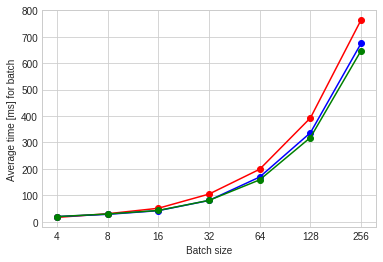

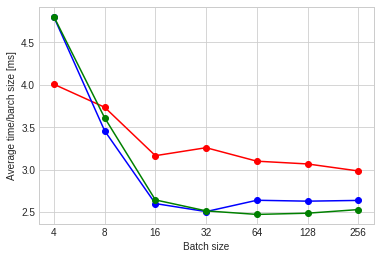

In [0]:
plt.plot(x5, times_model[:,0], marker='o', color='red')
plt.plot(x5, times_frozen[:,0], marker='o', color='blue')
plt.plot(x5, times_optimized[:,0], marker='o', color='green')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x5, my_xticks)

plt.figure()
plt.plot(x6, times_model[:,1], marker='o', color='red')
plt.plot(x6, times_frozen[:,1], marker='o', color='blue')
plt.plot(x6, times_optimized[:,1], marker='o', color='green')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x6, my_xticks)



print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print('')
print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))